# House Price Data Exploration

Import required libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Import the data into a DataFrame:

In [2]:
df_train = pd.read_csv('./data/train.csv')

## Feature correlation and importance

Check the correlation among the features:

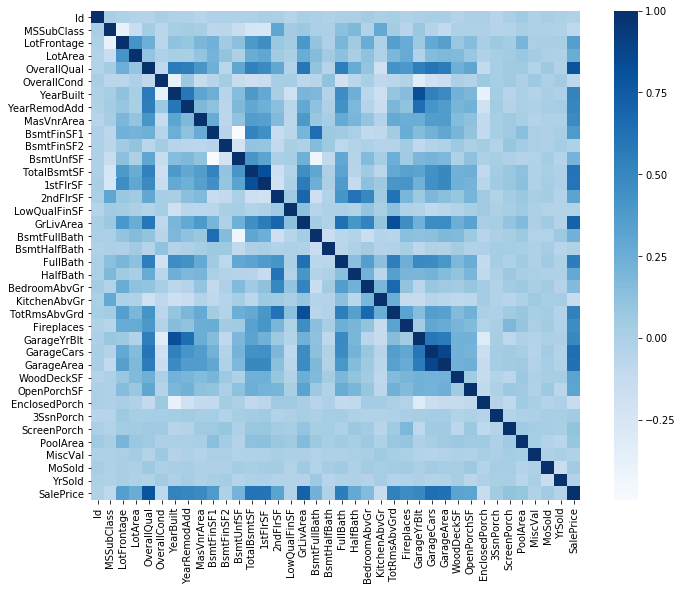

In [3]:
corr = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=1, cmap="Blues", square=True);

**The following features are highly correlated to each other and multicollinear. That is, they give almost the same information:**
* 'TotalBsmtSF' and '1stFlrSF'
* 'Garage...' features
* 'YearBuilt' and 'GarageYrBlt'
* 'TotRmsAbvGrd' and 'GrLivArea'

**As verified from the bottom-last row of the heatmap, we can check the relation of SalePrice with the rest of the features. We can conclude that the SalePrice is highly correlated with following features**
* 'OverallQual'
* 'GrLivArea' (and 'TotRmsAbvGrd': multi-colinear, so keep only one)
* 'GarageCars' ( and 'GarageArea': multi-colinear, so keep only one)
* 'TotalBsmtSF' ( and '1stFloor': multi-colinear, so keep only one)
* 'FullBath'
* 'YearBuilt' ( and 'GarageYrBlt': multi-colinear, so keep only one)

Check the correlation between 'SalePrice' and the identified highly correlated variables:

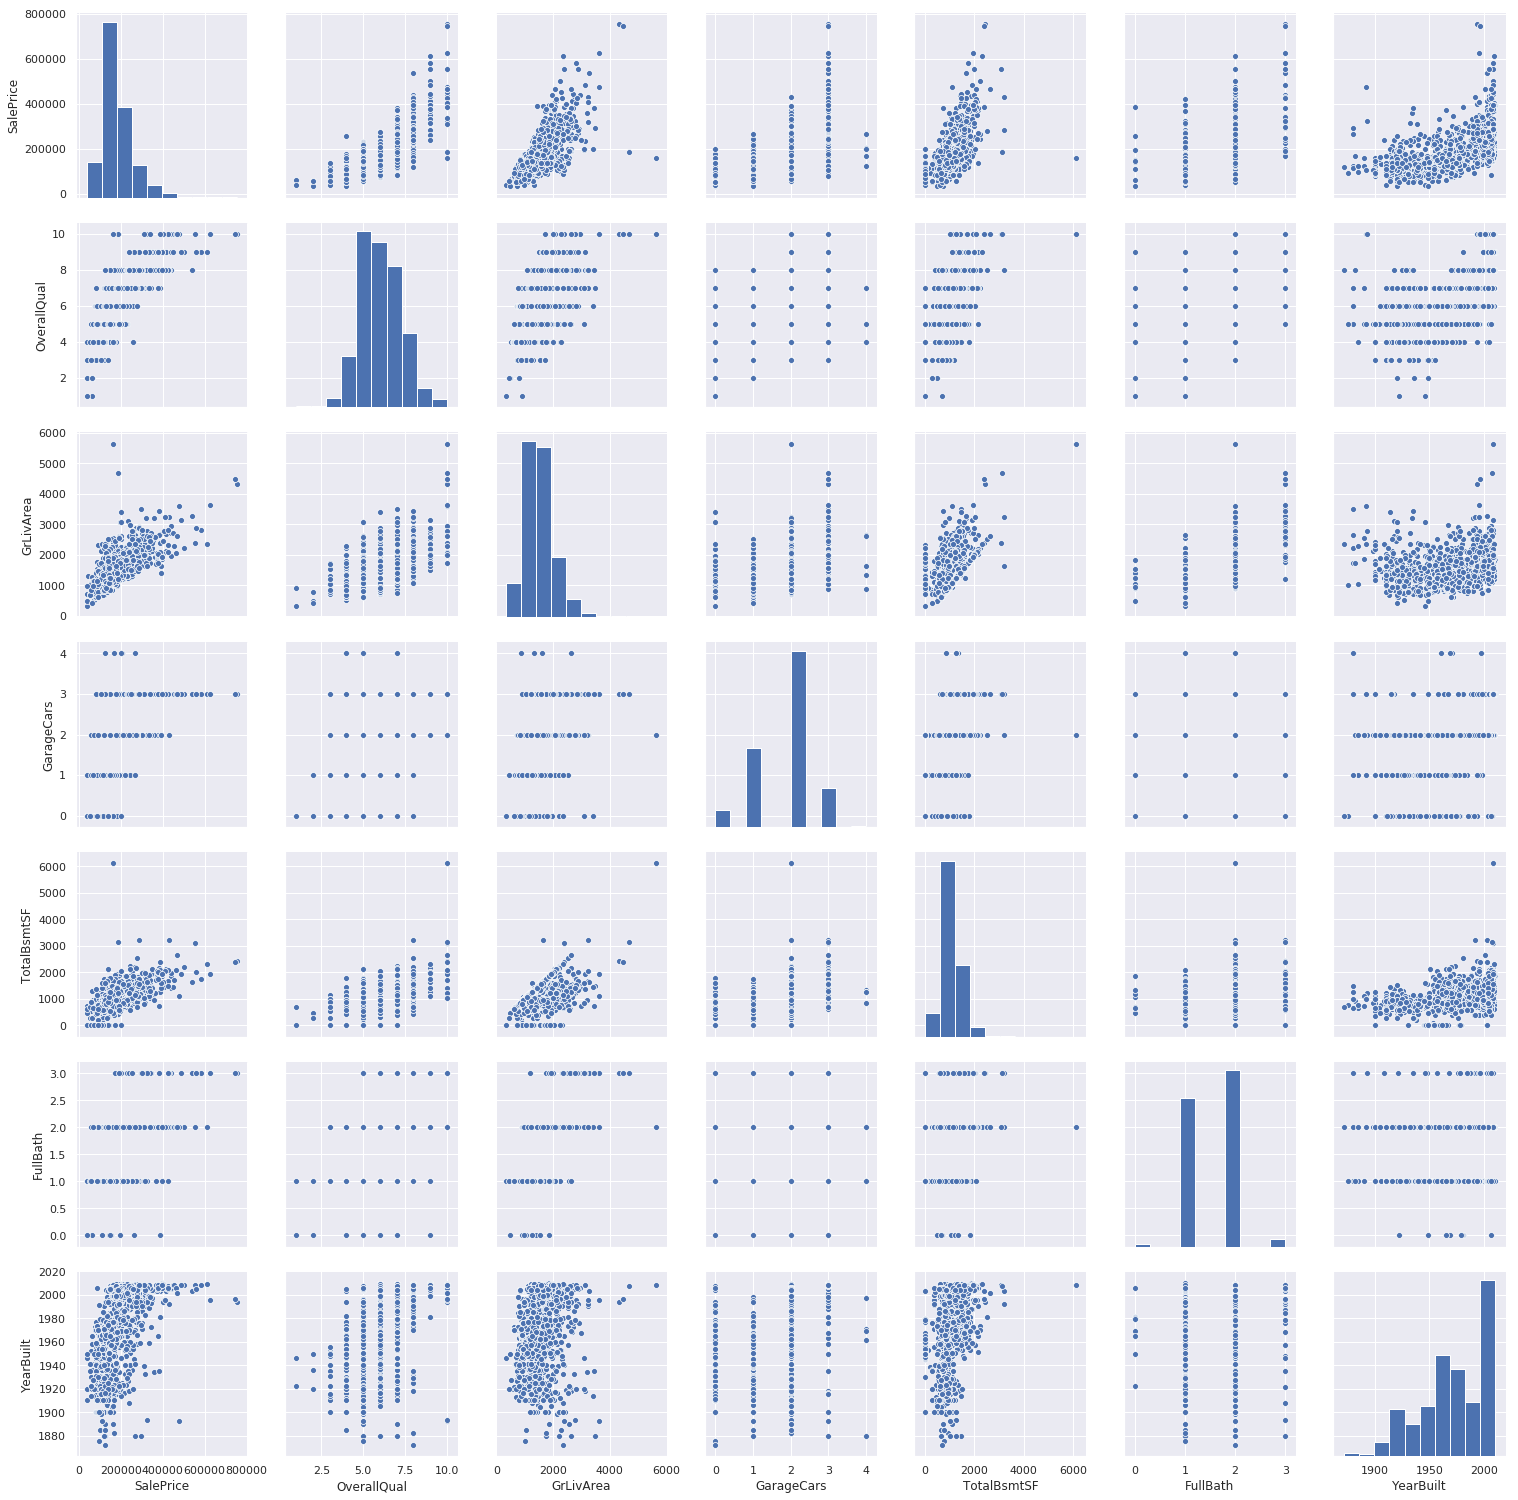

In [4]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 3)
plt.show();

**Interesting findings:**
* 'TotalBsmtSF' and 'GrLiveArea': Dots almost forming a linear border with the majority of the dots staying below that border, implying that basement areas are expected to be be equal or bigger than the above ground living area.
* The plot between 'SalePrice' and 'YearBuilt' is slightly exponential function implying that prices increasing at a higher rate nowadays.

## Missing data

Missing data may imply a reduction of the sample size, which can hinder the analysis.<br>
Check for missing data, and identify if there is any pattern or is just random:

In [5]:
total_missing = df_train.isnull().sum().sort_values(ascending=False)
percent_missing = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing[(missing != 0).all(1)]

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


**The following features have more than 15% data missing, so we can exclude these from our required features list.**
* PoolQC 99.5%
* MiscFeature 96.3%
* Alley 93.8%
* Fence 80.7%
* FireplaceQu 47.3%
* LotFrontage 17.7%

These are not important features and are also outlier candidates.

**The following features specific to the Garage and Basement have the same number of missing data (5.5%), and are not critical. So we can exclude these from our required features list.**
* GarageCond 81 5.5%
* GarageType 81	5.5%
* GarageYrBlt 81 5.5%
* GarageFinish 81 5.5%
* GarageQual 81 5.5%
* BsmtExposure 38 2.6%
* BsmtFinType2 38 2.6%
* BsmtFinType1 37 2.5%
* BsmtCond 37 2.53%
* BsmtQual 37 2.53%

**The following features are not essential, so we can exclude them from our required features list:**
* 'MasVnrArea'
* 'MasVnrType'

**The 'Electrical' feature has one missing observation so, we delete this observation and keep the variable.**

**Thus, essentially, we may delete all the other features with missing data.**

## Outliers

Outliers can affect models and can be a valuable source of insightful information.

To determine a threshold for marking data points as outliers, the deviation of standardized/scaled 'SalePrice' is obtained: 

In [6]:
SalePrice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);

In [7]:
SalePrice_scaled[SalePrice_scaled[:,0].argsort()][:20]

array([[-1.83870376],
       [-1.83352844],
       [-1.80092766],
       [-1.78329881],
       [-1.77448439],
       [-1.62337999],
       [-1.61708398],
       [-1.58560389],
       [-1.58560389],
       [-1.5731    ],
       [-1.54153178],
       [-1.52264373],
       [-1.52264373],
       [-1.52264373],
       [-1.51005169],
       [-1.49263691],
       [-1.46597958],
       [-1.44079551],
       [-1.43449949],
       [-1.43449949]])

In [8]:
SalePrice_scaled[SalePrice_scaled[:,0].argsort()][-20:]

array([[3.08604046],
       [3.1364086 ],
       [3.226492  ],
       [3.24696665],
       [3.26232893],
       [3.34116765],
       [3.41280373],
       [3.57712976],
       [3.59601781],
       [3.70305009],
       [3.82897043],
       [4.04098249],
       [4.49634819],
       [4.71041276],
       [4.73032076],
       [5.06214602],
       [5.42383959],
       [5.59185509],
       [7.10289909],
       [7.22881942]])

**The lower values are not far, but the higher range values are a bit far. However, none of them can be concretely considered as an outlier**

The plot of the important features are obtained to check for outliers:

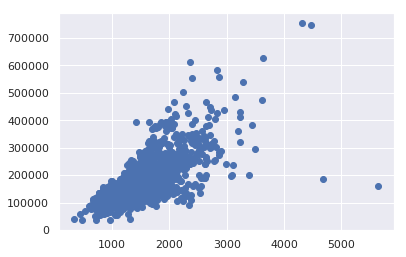

In [9]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

**The two observations with greater than 4000 'GrLivArea' but lesser than 200k 'SalePrice' are not typical and do not follow the general trend of price rise. So they can be considered as outliers and deleted.**

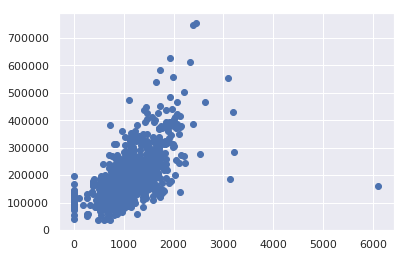

In [10]:
plt.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])

**The observation with greater than 6000 'TotalBsmtSF' but lesser than 200k 'SalePrice' can be considered as an outliers, and the corresponding observation is to be deleted.**

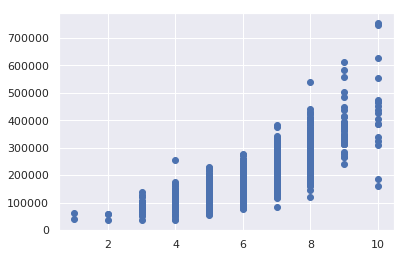

In [11]:
plt.scatter(df_train['OverallQual'], df_train['SalePrice'])

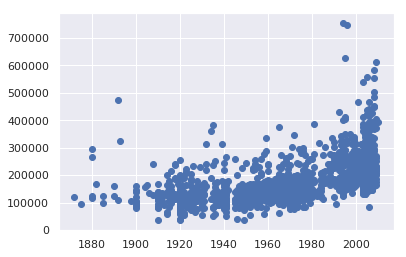

In [12]:
plt.scatter(df_train['YearBuilt'], df_train['SalePrice'])

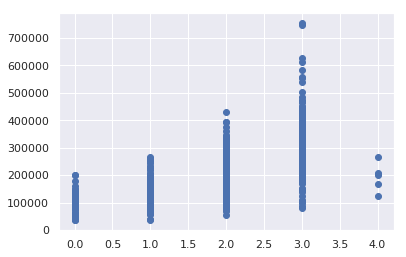

In [13]:
plt.scatter(df_train['GarageCars'], df_train['SalePrice'])

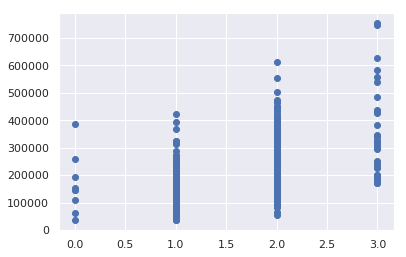

In [14]:
plt.scatter(df_train['FullBath'], df_train['SalePrice'])

**The other important features do not reveal any outlier.**

## Skewness

Check the distribution of the ***SalePrice***:

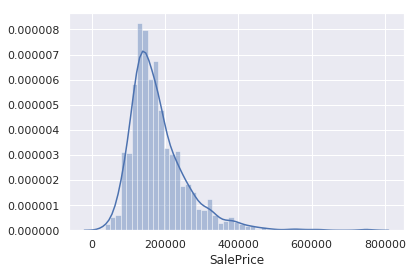

In [15]:
sns.distplot(df_train['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

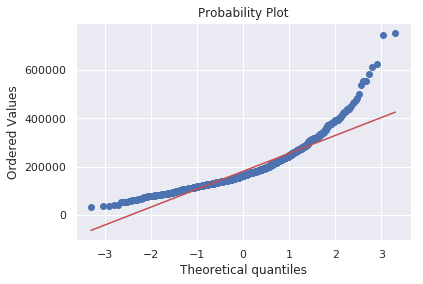

In [16]:
stats.probplot(df_train['SalePrice'], plot=plt)

Check the distribution of the ***GrLivArea***:

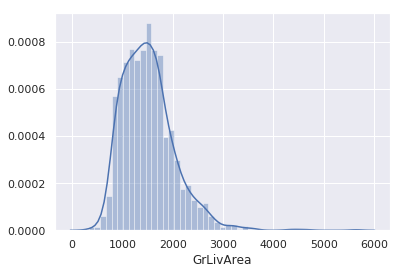

In [17]:
sns.distplot(df_train['GrLivArea'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 334,  438,  480, ..., 4476, 4676, 5642])),
 (506.6815508249053, 1515.463698630137, 0.9626338898809194))

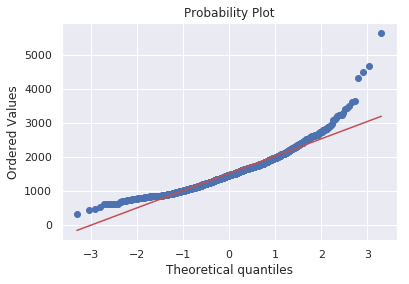

In [18]:
stats.probplot(df_train['GrLivArea'], plot=plt)

Check the distribution of the ***TotalBsmtSF***:

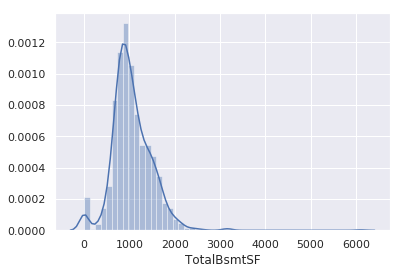

In [19]:
sns.distplot(df_train['TotalBsmtSF'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([   0,    0,    0, ..., 3200, 3206, 6110])),
 (420.29496021095537, 1057.4294520547944, 0.9564534567679277))

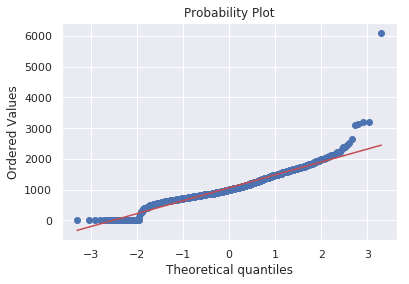

In [20]:
stats.probplot(df_train['TotalBsmtSF'], plot=plt)

***SalePrice* and *GrLivArea* deviate from the normal distribution, and have positive skewness while peaking.<br>
These will be handled by performing log operation on them to remove the skewness.**

**For 'TotalBsmtSF', not only does it deviate from the normal distribution, and have positive skewness while peaking, it also has a number of observations with value 0 implying houses without basement.<br>
*log* operation cannot be performedon on zero values.<br>
To handle this, the plan is to apply *log* operation to only those 'TotalBsmtSF' that are greater than 0.**